In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pickle
from neuralprophet import NeuralProphet

In [5]:
df = pd.read_csv('Honavar.csv')

In [6]:
df

,Unnamed: 0,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,...,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,0,2010-01-01 00:00:00+00:00,23.106500,92.686380,21.856500,27.016226,0.0,0.0,0.0,0.0,...,1007.95520,0.000000,0.0,0.0,0.0,6.409617,11.435313,51.842735,61.821507,15.480000
1,1,2010-01-01 01:00:00+00:00,23.106500,91.841064,21.706501,26.744470,0.0,0.0,0.0,0.0,...,1008.45435,0.600000,0.0,1.0,0.0,7.704336,13.708390,52.594578,60.068577,16.919998
2,2,2010-01-01 02:00:00+00:00,23.306500,90.460890,21.656500,26.685429,0.0,0.0,0.0,0.0,...,1009.05460,0.900000,1.0,0.0,0.0,9.290511,15.946010,54.462240,61.699340,18.359999
3,3,2010-01-01 03:00:00+00:00,25.006500,84.219730,22.156500,28.647530,0.0,0.0,0.0,0.0,...,1009.86290,0.000000,0.0,0.0,0.0,9.387651,15.941944,57.528828,64.592320,20.519999
4,4,2010-01-01 04:00:00+00:00,26.606500,77.303190,22.306500,30.285740,0.0,0.0,0.0,0.0,...,1010.47144,0.000000,0.0,0.0,0.0,9.693296,14.345898,68.198530,72.474340,20.880001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,123931,2024-02-20 19:00:00+00:00,23.429500,91.860054,22.029500,27.991505,0.0,0.0,0.0,0.0,...,1010.35297,22.800001,0.0,0.0,76.0,2.595997,9.000000,56.309914,343.739720,7.559999
123932,123932,2024-02-20 20:00:00+00:00,21.829498,98.182910,21.529500,25.863148,0.0,0.0,0.0,0.0,...,1009.64470,45.600002,19.0,0.0,95.0,4.334974,3.600000,94.763560,36.869990,7.559999
123933,123933,2024-02-20 21:00:00+00:00,20.779500,99.386210,20.679500,24.228530,0.0,0.0,0.0,0.0,...,1008.93990,100.000000,100.0,0.0,96.0,5.241679,2.902413,105.945465,97.124920,9.720000
123934,123934,2024-02-20 22:00:00+00:00,20.529500,98.468830,20.279500,23.433128,0.0,0.0,0.0,0.0,...,1008.73870,32.400000,5.0,0.0,93.0,7.568566,7.491114,115.346140,144.782320,12.959999


In [7]:
df['date']= pd.to_datetime(df['date'])
df.head()

,Unnamed: 0,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,...,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,0,2010-01-01 00:00:00+00:00,23.1065,92.686380,21.856500,27.016226,0.0,0.0,0.0,0.0,...,1007.95520,0.0,0.0,0.0,0.0,6.409617,11.435313,51.842735,61.821507,15.480000
1,1,2010-01-01 01:00:00+00:00,23.1065,91.841064,21.706501,26.744470,0.0,0.0,0.0,0.0,...,1008.45435,0.6,0.0,1.0,0.0,7.704336,13.708390,52.594578,60.068577,16.919998
2,2,2010-01-01 02:00:00+00:00,23.3065,90.460890,21.656500,26.685429,0.0,0.0,0.0,0.0,...,1009.05460,0.9,1.0,0.0,0.0,9.290511,15.946010,54.462240,61.699340,18.359999
3,3,2010-01-01 03:00:00+00:00,25.0065,84.219730,22.156500,28.647530,0.0,0.0,0.0,0.0,...,1009.86290,0.0,0.0,0.0,0.0,9.387651,15.941944,57.528828,64.592320,20.519999
4,4,2010-01-01 04:00:00+00:00,26.6065,77.303190,22.306500,30.285740,0.0,0.0,0.0,0.0,...,1010.47144,0.0,0.0,0.0,0.0,9.693296,14.345898,68.198530,72.474340,20.880001


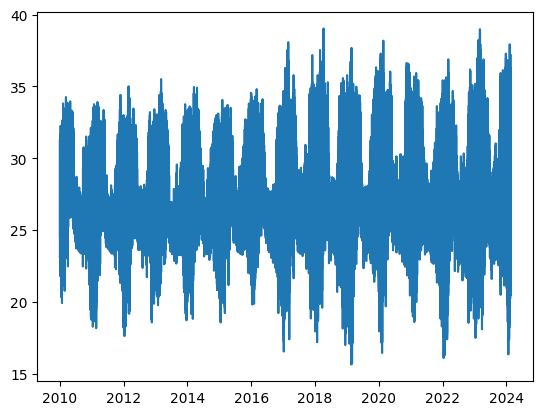

In [8]:
plt.plot(df['date'], df['temperature_2m'])
plt.show()

In [9]:
data = df[['date', 'temperature_2m']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data.head()

WARNING - (py.warnings._showwarnmsg) - /var/folders/s_/_3nm182x4yl7dr0fq2rv72gh0000gn/T/ipykernel_12849/537517829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,2010-01-01 00:00:00+00:00,23.1065
1,2010-01-01 01:00:00+00:00,23.1065
2,2010-01-01 02:00:00+00:00,23.3065
3,2010-01-01 03:00:00+00:00,25.0065
4,2010-01-01 04:00:00+00:00,26.6065


In [10]:
m = NeuralProphet()


In [11]:
model = m.fit(data, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/akshay/Documents/Real-weather/venv/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/akshay/Documents/Real-weather/venv/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/akshay/Documents/Real-weather/venv/lib

Epoch 1000: 100%|██████████| 1000/1000 [00:03<00:00, 250.96it/s, loss=0.014, v_num=1, MAE=1.300, RMSE=1.700, Loss=0.0138, RegLoss=0.000]     


In [12]:
fut = m.make_future_dataframe(data, periods=365) 
forecast = m.predict(fut)
forecast.head()

WARNING - (py.warnings._showwarnmsg) - /Users/akshay/Documents/Real-weather/venv/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/akshay/Documents/Real-weather/venv/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/akshay/Documents/Real-weather/venv/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in 

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 437.50it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2024-02-21 23:00:00,None,23.967327,26.562668,-0.073271,0.073891,-2.595959
1,2024-02-22 23:00:00,None,23.944241,26.562647,-0.032048,0.007459,-2.593819
2,2024-02-23 23:00:00,None,23.916361,26.562628,0.009570,-0.058835,-2.597001
3,2024-02-24 23:00:00,None,23.984600,26.562611,0.051450,-0.031203,-2.598256
4,2024-02-25 23:00:00,None,24.047472,26.562592,0.093532,-0.012535,-2.596115


In [30]:
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2024-02-21 23:00:00,None,23.967327,26.562668,-0.073271,0.073891,-2.595959
1,2024-02-22 23:00:00,None,23.944241,26.562647,-0.032048,0.007459,-2.593819
2,2024-02-23 23:00:00,None,23.916361,26.562628,0.009570,-0.058835,-2.597001
3,2024-02-24 23:00:00,None,23.984600,26.562611,0.051450,-0.031203,-2.598256
4,2024-02-25 23:00:00,None,24.047472,26.562592,0.093532,-0.012535,-2.596115
...,...,...,...,...,...,...,...
360,2025-02-15 23:00:00,None,23.646935,26.555843,-0.281949,-0.031182,-2.595778
361,2025-02-16 23:00:00,None,23.706608,26.555824,-0.243396,-0.012534,-2.593285
362,2025-02-17 23:00:00,None,23.725094,26.555805,-0.204300,-0.026180,-2.600231
363,2025-02-18 23:00:00,None,23.840614,26.555786,-0.164536,0.047450,-2.598084


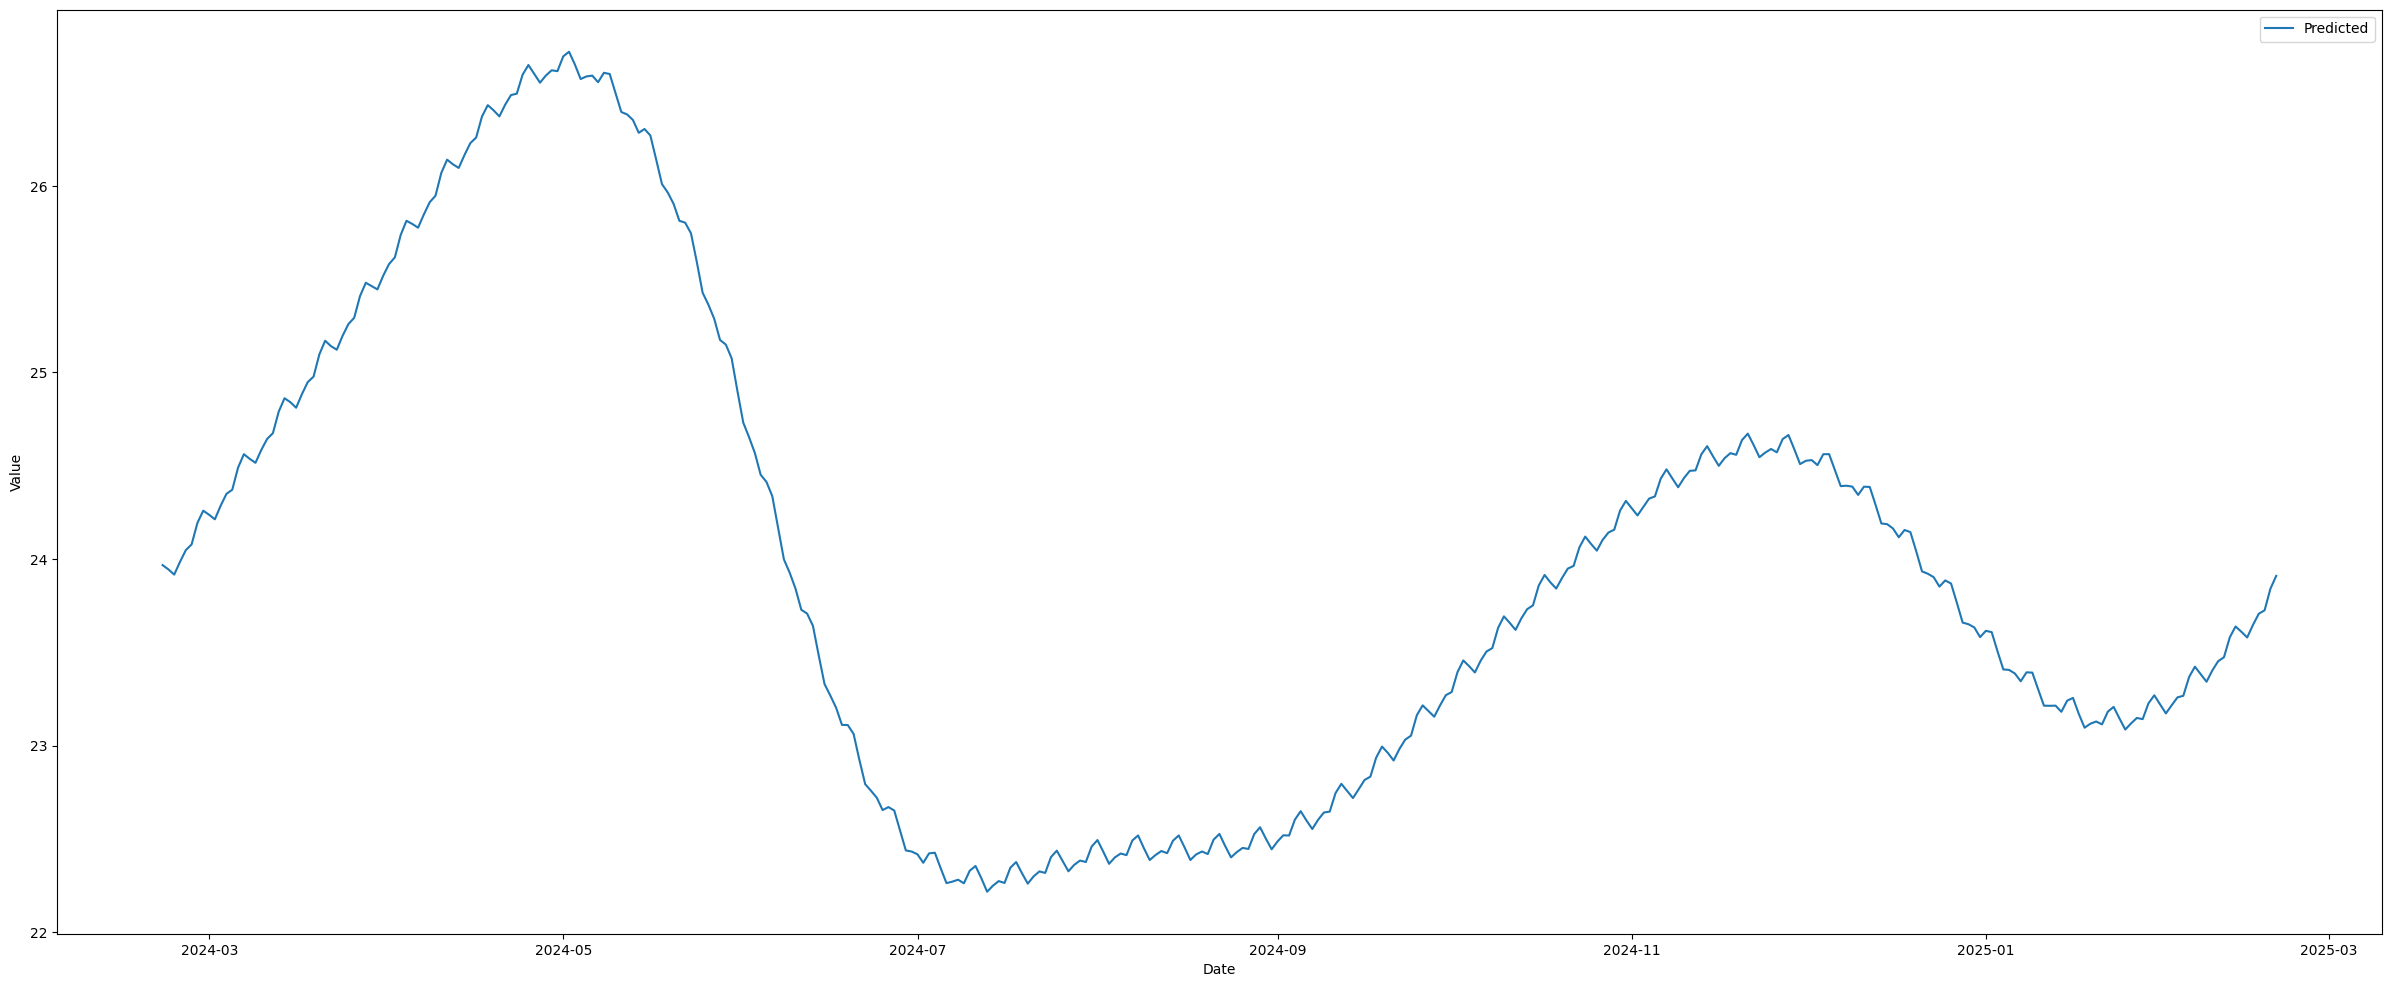

In [29]:
plt.figure(figsize=(30, 12))
plt.plot(forecast['ds'], forecast['yhat1'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

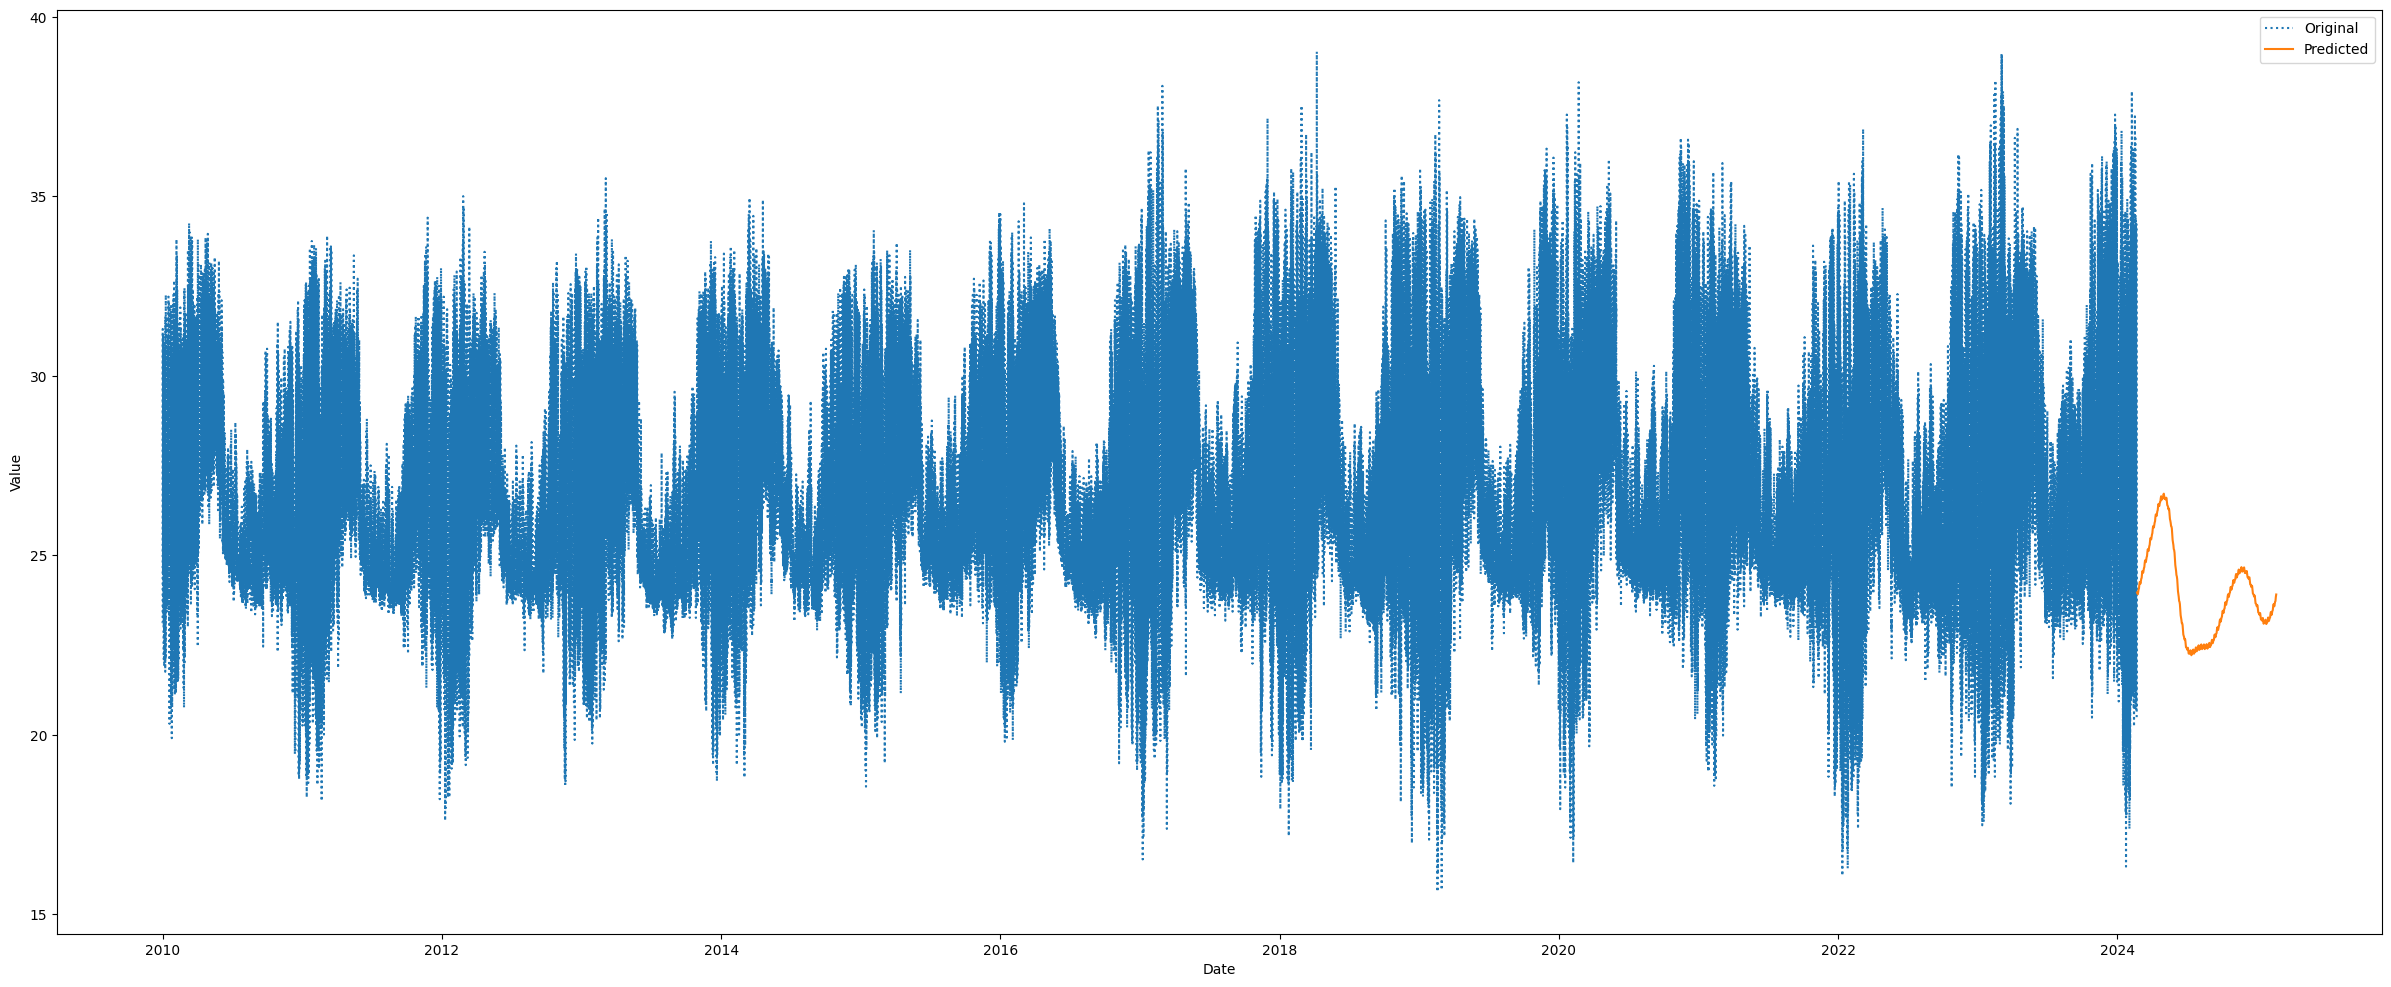

In [22]:
plt.figure(figsize=(30, 12))
plt.plot(data['ds'], data['y'], label='Original',linestyle='dotted')
plt.plot(forecast['ds'], forecast['yhat1'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()